In [61]:
import random

from importlib import reload
import src.data
import src.graph_utils
import src.cascade_failure
import src.visualization
reload(src.cascade_failure)
reload(src.data)
reload(src.graph_utils)
reload(src.visualization)

from src.data import load_data, save_data, load_data_with_atributes
from src.graph_utils import calculate_edge_lengths, assign_grid_attributes
from src.cascade_failure import cascade_failure, cascade_simulation
from src.visualization import draw_graph, draw_graph_after_failure


In [48]:
G = load_data()

Graph loaded: 4941 nodes, 6594 edges


### Random edge attack

After attack: 4941 nodes, 6551 edges


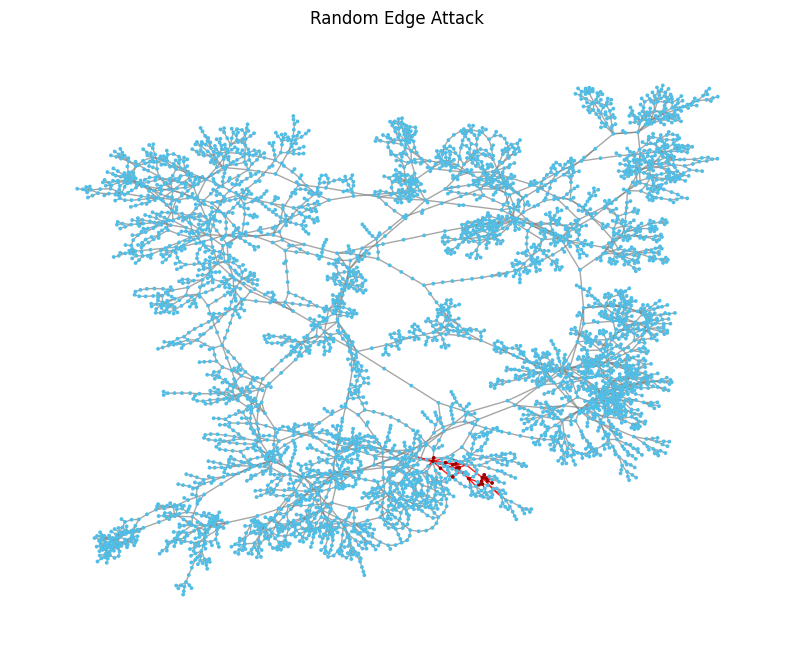

In [24]:
edges_list = list(G.edges())
random_edge = random.choice(edges_list)
initial_failed_edges = []
initial_failed_edges.append(random_edge)
G_after_attack, failed_edges = cascade_failure(graph=G, initial_failed_edges=initial_failed_edges, threshold=0.3)
print(f"After attack: {G_after_attack.number_of_nodes()} nodes, {G_after_attack.number_of_edges()} edges")

draw_graph_after_failure(G_before=G, G_after=G_after_attack, failed_edges=failed_edges, title="Random Edge Attack")

### Random node attack

After attack: 4941 nodes, 6592 edges


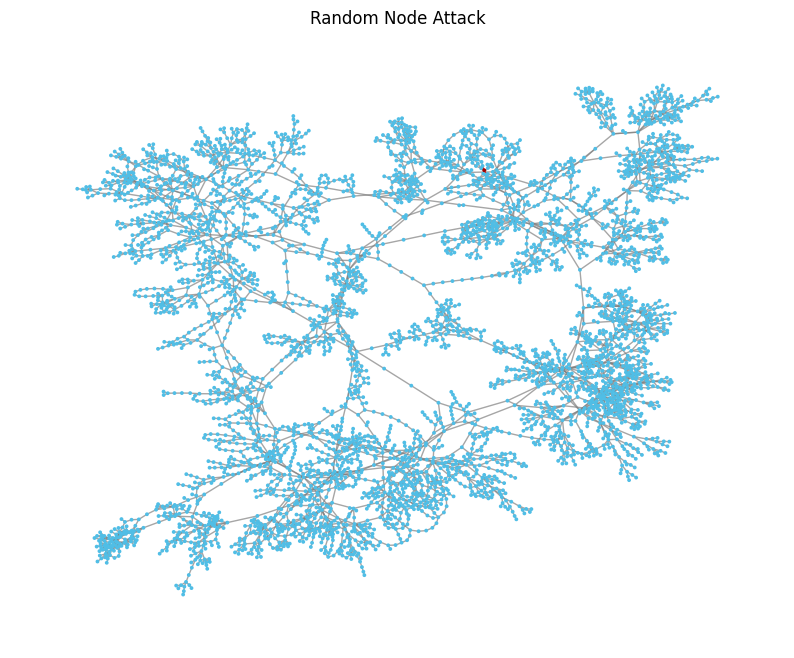

In [25]:
nodes_list = list(G.nodes())
random_node = random.choice(nodes_list)
incident_edges = list(G.edges(random_node))
initial_edges = []
initial_edges.extend(incident_edges)
G_after_attack, failed_edges = cascade_failure(graph=G, initial_failed_edges=initial_edges, threshold=0.2)
print(f"After attack: {G_after_attack.number_of_nodes()} nodes, {G_after_attack.number_of_edges()} edges")

draw_graph_after_failure(G_before=G, G_after=G_after_attack, failed_edges=failed_edges, title="Random Node Attack")

# DC model

Graph loaded: 4941 nodes, 6594 edges
Iterations: 1
Load served fraction: 1.0
0 overloaded: 0


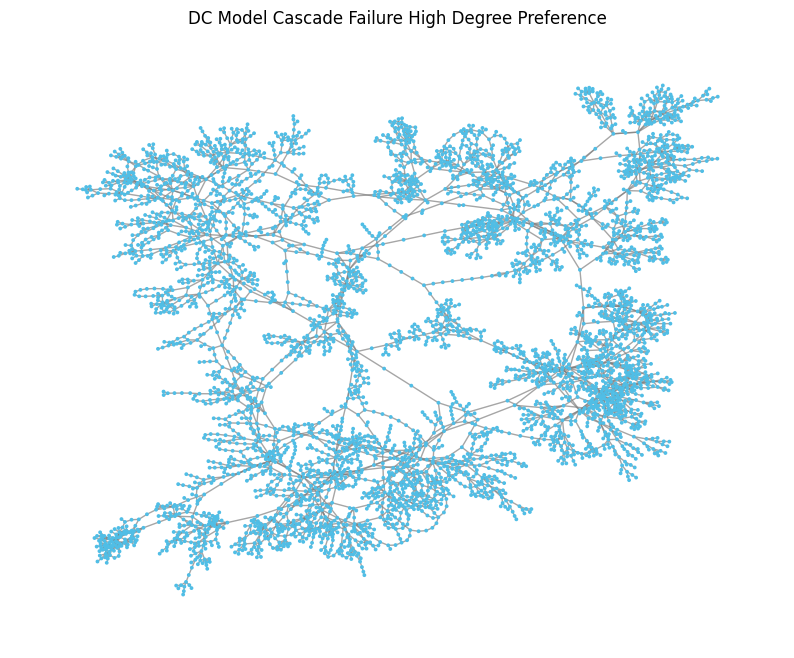

In [62]:
G = load_data_with_atributes()

result_after_attack = cascade_simulation(G0=G)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure High Degree Preference")

Iterations: 4
Load served fraction: 1.0
0 overloaded: 5
1 overloaded: 5
2 overloaded: 1
3 overloaded: 0


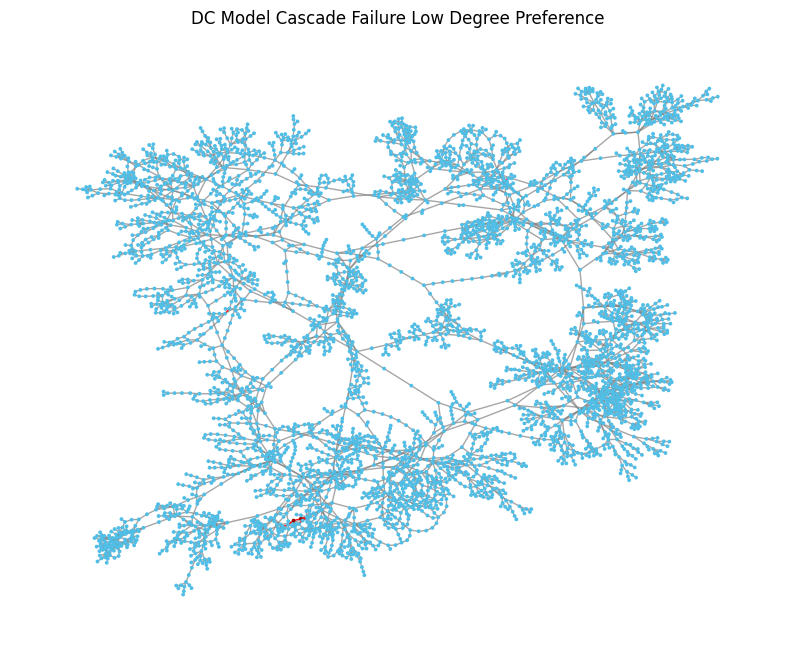

In [15]:
result_after_attack = cascade_simulation(G0=G)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure Low Degree Preference")

Iterations: 5
Load served fraction: 1.0
0 overloaded: 3
1 overloaded: 1
2 overloaded: 2
3 overloaded: 1
4 overloaded: 0


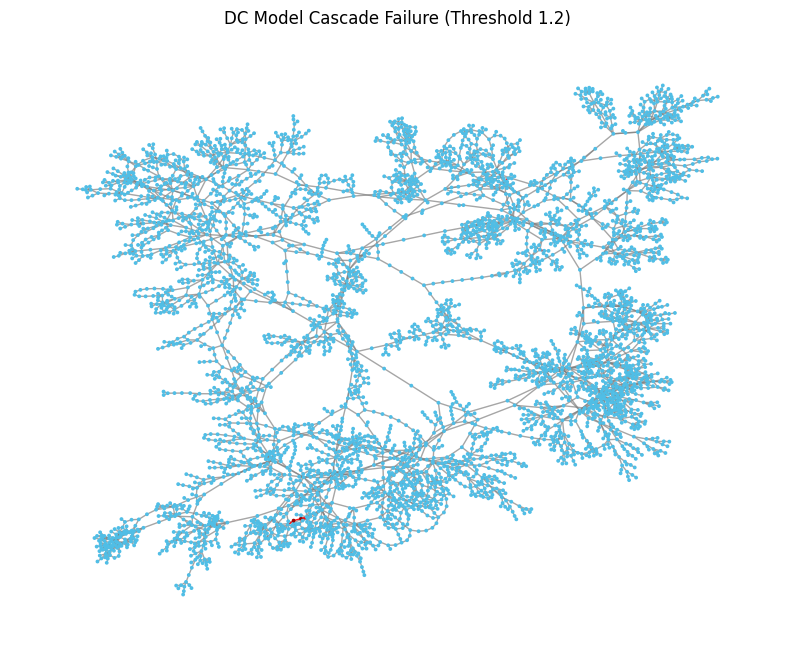

In [16]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=1.2)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 1.2)")

Iterations: 2
Load served fraction: 1.0
0 overloaded: 1
1 overloaded: 0


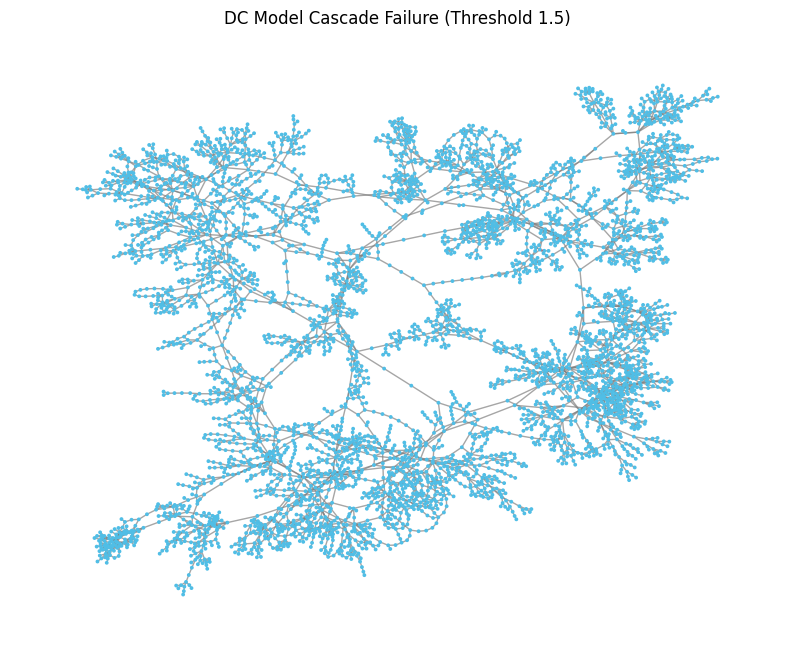

In [17]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=1.5)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 1.5)")

In [19]:
result_after_attack = cascade_simulation(G0=G, trip_threshold=2)

print("Iterations:", len(result_after_attack['history']))
print("Load served fraction:", result_after_attack['load_served_fraction'])
for h in result_after_attack['history']:
    print(h['iteration'], "overloaded:", h['overloaded_count'])

failed_edges = []
for step in result_after_attack['history']:
    failed_edges.extend(step['overloaded_edges'])

draw_graph_after_failure(G_before=G, G_after=result_after_attack['graph'], failed_edges=failed_edges, title="DC Model Cascade Failure (Threshold 2)")

KeyboardInterrupt: 